## Medical Transcript Exploration Using Comprehend Medical

In [1]:
! pip install PyPandoc 
! pip install wordcloud
! pip install matplotlib

  Running setup.py bdist_wheel for PyPandoc ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/3e/55/4f/59e0fa0914f3db52e87c0642c5fb986871dfbbf253026e639f
Successfully built PyPandoc
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 368kB 34.4MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from botocore.vendored import requests
import json
import boto3
import pandas as pd
import pypandoc
import time
from IPython.display import display, Markdown, HTML, Audio

In [7]:
cm = boto3.client(service_name='comprehendmedical')
s3 = boto3.client('s3')

### Read the Txt File and Get data

In [8]:
with open("./mtsamples.txt", "r") as f:
    mtsamples = f.read()

print(mtsamples)

Sample Type / Medical Specialty: Cardiovascular / Pulmonary
Sample Name: Abnormal Echocardiogram
Description: Abnormal echocardiogram findings and followup. Shortness of breath, congestive heart failure, and valvular insufficiency. The patient complains of shortness of breath, which is worsening. The patient underwent an echocardiogram, which shows severe mitral regurgitation and also large pleural effusion.
(Medical Transcription Sample Report)
REASON FOR CONSULTATION: Abnormal echocardiogram findings and followup. Shortness of breath, congestive heart failure, and valvular insufficiency.

HISTORY OF PRESENT ILLNESS: The patient is an 86-year-old female admitted for evaluation of abdominal pain and bloody stools. The patient has colitis and also diverticulitis, undergoing treatment. During the hospitalization, the patient complains of shortness of breath, which is worsening. The patient underwent an echocardiogram, which shows severe mitral regurgitation and also large pleural effusio

### Invoke Comprehend Medical and Get Results

In [12]:
# Creating empty lists for a dataframe
df_d = []  # Diagnosis
df_s = []  # Symptoms
df_m = []  # Medications

# Call the detect_entities API to extract the entities
testresult = cm.detect_entities(Text = mtsamples)

testresult

{'Entities': [{'Id': 1,
   'BeginOffset': 82,
   'EndOffset': 96,
   'Score': 0.9990850687026978,
   'Text': 'Echocardiogram',
   'Category': 'TEST_TREATMENT_PROCEDURE',
   'Type': 'TEST_NAME',
   'Traits': [],
   'Attributes': [{'Type': 'TEST_VALUE',
     'Score': 0.4455971121788025,
     'RelationshipScore': 0.9999724626541138,
     'Id': 0,
     'BeginOffset': 73,
     'EndOffset': 81,
     'Text': 'Abnormal',
     'Traits': []}]},
  {'Id': 3,
   'BeginOffset': 119,
   'EndOffset': 133,
   'Score': 0.9937397241592407,
   'Text': 'echocardiogram',
   'Category': 'TEST_TREATMENT_PROCEDURE',
   'Type': 'TEST_NAME',
   'Traits': [],
   'Attributes': [{'Type': 'TEST_VALUE',
     'Score': 0.9780229926109314,
     'RelationshipScore': 0.9999980926513672,
     'Id': 2,
     'BeginOffset': 110,
     'EndOffset': 118,
     'Text': 'Abnormal',
     'Traits': []}]},
  {'Id': 9,
   'BeginOffset': 157,
   'EndOffset': 176,
   'Score': 0.980466902256012,
   'Text': 'Shortness of breath',
   'Categ

In [13]:
# Defining variables for creating Wordclouds
text = ''
symptoms = ''
medication = ''
diagnosis = ''

# Create a list of entities
testentities = testresult['Entities']

# Creating a loop to iterate through the individual entities
for row in testentities:

    # Redacting PHI (Personal Health Information) from the extracted entites
    if row['Category'] != "PERSONAL_IDENTIFIABLE_INFORMATION":
        text += row['Text'] + ' '

        if len(row['Traits']) == 1 and row['Traits'][0]['Name'] == "SYMPTOM":
            symptoms += row['Text'] + ' '
            df_s.append(row['Text'])

        if row['Category'] == "MEDICATION":
            medication += row['Text'] + ' '
            df_m.append(row['Text'])

        if len(row['Traits']) == 1 and row['Traits'][0]['Name'] == "DIAGNOSIS":
            diagnosis += row['Text'] + ' '
            df_d.append(row['Text'])

### Visualizing the results

In [14]:
# Creating visualizations

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

def medical_resume_wordcloud(text):
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(width = 600, height = 300, background_color = 'black', max_words = len(text),
                          max_font_size = 30, relative_scaling = .5, colormap = 'Spectral').generate(text)
    plt.figure(figsize = (20, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()


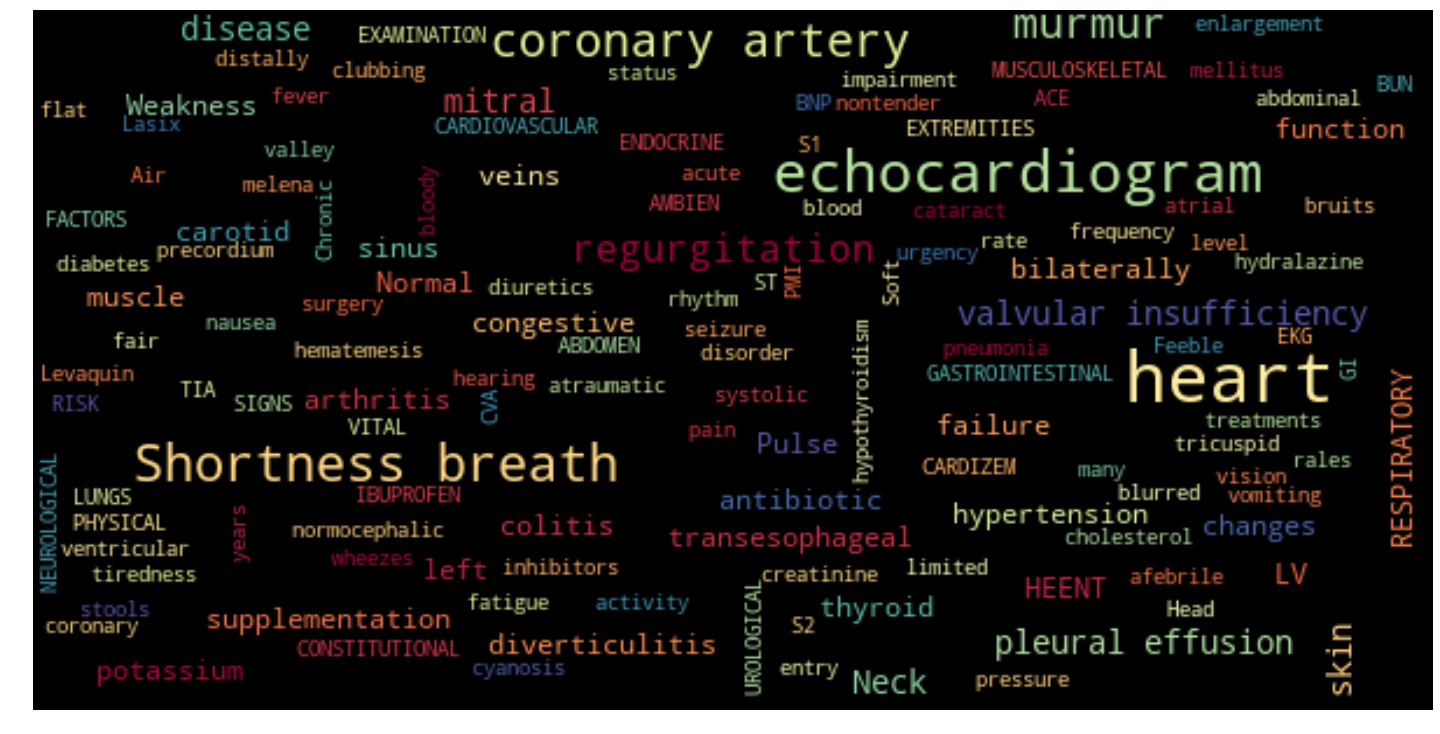

In [15]:
medical_resume_wordcloud(text)

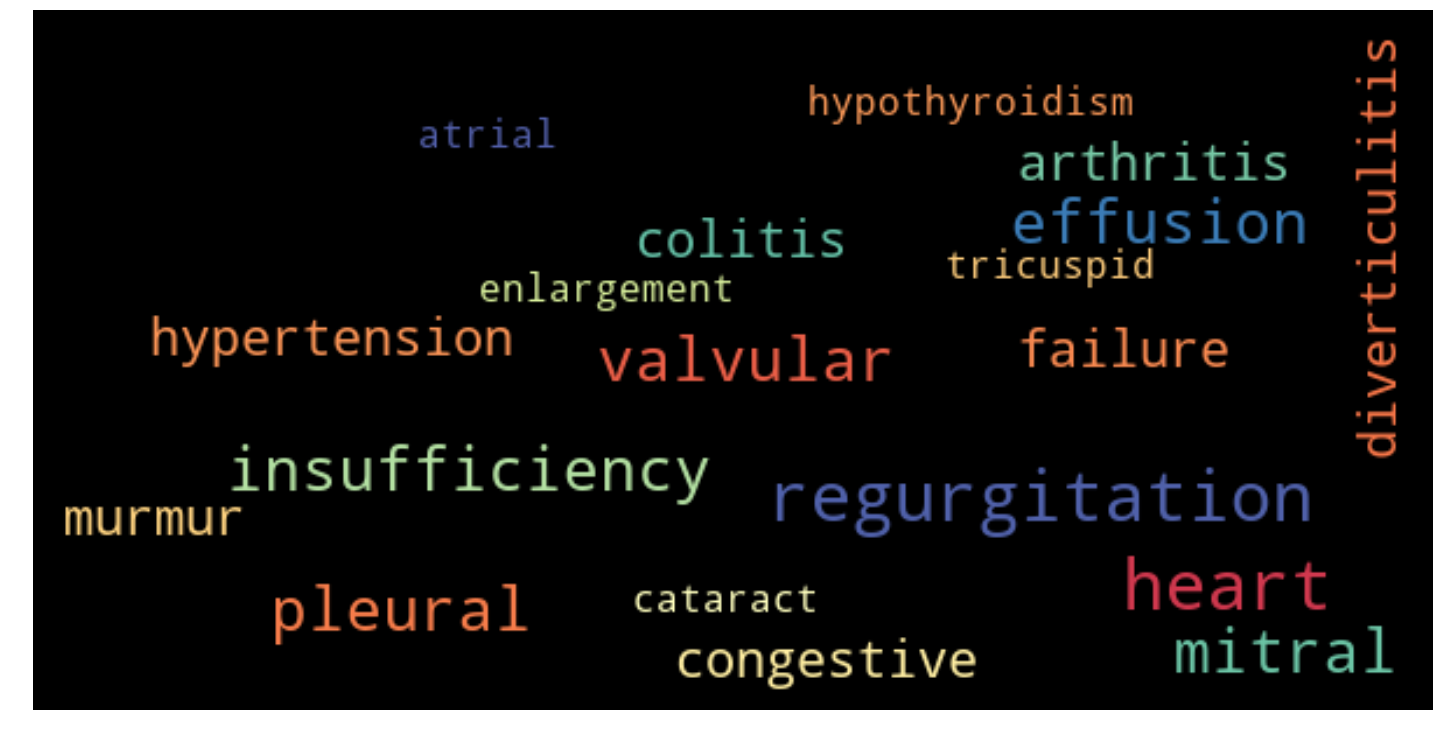

In [16]:
medical_resume_wordcloud(diagnosis)


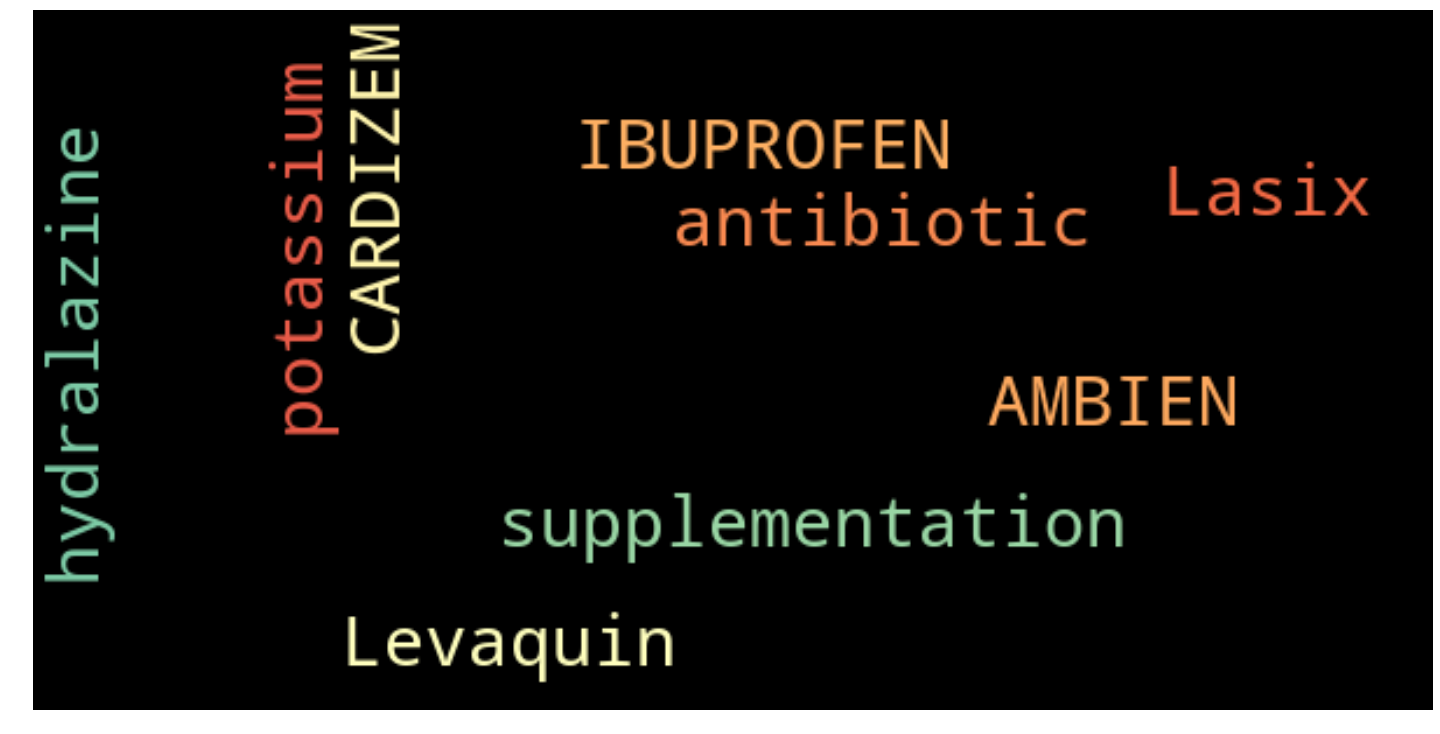

In [17]:
medical_resume_wordcloud(medication)